In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [330]:
# hyperparameter selection/tuning
dat = pd.read_csv('supervised_input.csv')
dat = dat.loc[:,dat.columns != 'Unnamed: 0']
dat = dat.loc[:,dat.columns != 'Team 1']
dat = dat.loc[:,dat.columns != 'Team 2']
# X and y split
X = dat.loc[:, dat.columns != 'Win']
y = dat.loc[:, dat.columns == 'Win']
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().flatten(), test_size=0.3, random_state=0)
rdf = RandomForestClassifier(random_state=0)
model_params = {
    'n_estimators': randint(50,350),
    'max_depth': randint(2,6),
    'max_features': truncnorm(a=0,b=1,loc=0.25,scale=0.15),
    'max_leaf_nodes': randint(2,33),
    'min_samples_split': uniform(.01,.19),
    'min_samples_leaf': uniform(.01,.49)
}
clf = RandomizedSearchCV(rdf, model_params, n_iter=200, cv=5, random_state=0)
model = clf.fit(X_train, y_train)
from pprint import pprint
pprint(model.best_estimator_.get_params())
print(clf.score(X_test, y_test))


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.29262772740202614,
 'max_leaf_nodes': 18,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.023263802540823154,
 'min_samples_split': 0.14896549459996708,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 154,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
0.6559766763848397


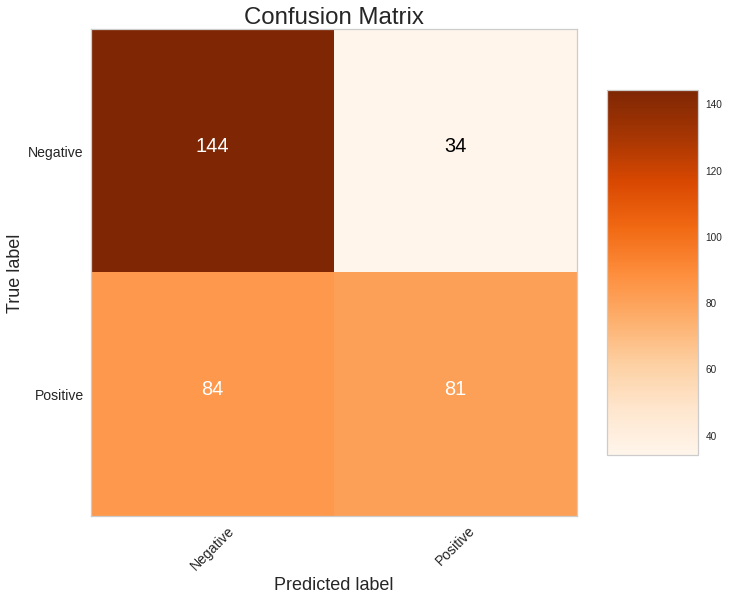

Accuracy(%): 65.59766763848397
Precision(%): 70.43478260869566
Recall(%): 49.09090909090909
F1-Score(%): 57.85714285714286


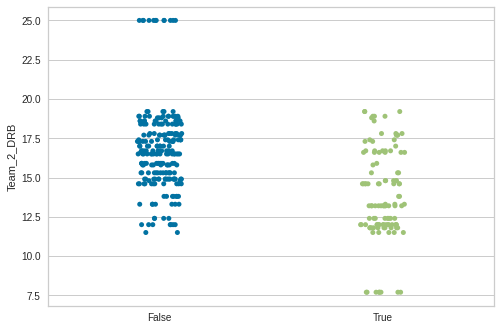

In [331]:
# random forest with optimized hyperparameters
dat = pd.read_csv('supervised_input.csv')
dat = dat.loc[:,dat.columns != 'Unnamed: 0']
dat = dat.loc[:,dat.columns != 'Team 1']
dat = dat.loc[:,dat.columns != 'Team 2']
# X and y split
X = dat.loc[:, dat.columns != 'Win']
y = dat.loc[:, dat.columns == 'Win']
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().flatten(), test_size=0.3, random_state=0)
# use hyperparameters found in random search cv
rdf = RandomForestClassifier(n_estimators=154, max_depth=5, max_features=.29, max_leaf_nodes=18, min_samples_split=.15, min_samples_leaf=0.023, random_state=0)
model = rdf.fit(X_train, y_train)
pred = rdf.predict(X_test)
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
# cm plot
plt.figure(figsize = (10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion Matrix', size = 24)
plt.colorbar(aspect=4)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45, size = 14)
plt.yticks(tick_marks, ['Negative', 'Positive'], size = 14)
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(cm[i, j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > 80 else "black")
plt.grid(None)
plt.tight_layout()
plt.ylabel('True label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.show()
# evaluation metrics
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1] + cm[1,0])
f1 = 2*precision*recall/(precision+recall)
print("Accuracy(%): " + str(rdf.score(X_test, y_test)*100))
print("Precision(%): " + str(precision*100))
print("Recall(%): " + str(recall*100))
print("F1-Score(%): " + str(f1*100))
# strip plot of win/lose predictions against most important feature (team 2 drb)
sns.stripplot(x=pred, y= X_test['Team_2_DRB'])


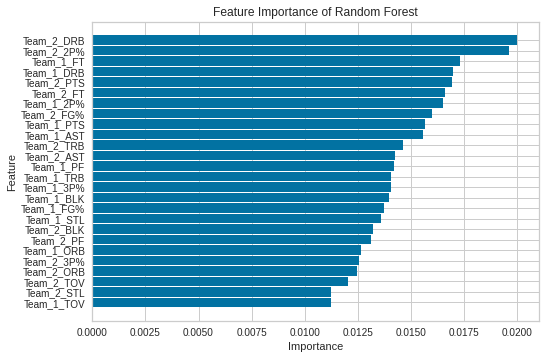

In [332]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
feature_list = np.array(['Team_1_FG%', 'Team_1_3P%', 'Team_1_2P%', 'Team_1_FT', 'Team_1_ORB', 'Team_1_DRB',
                'Team_1_TRB', 'Team_1_AST','Team_1_STL', 'Team_1_BLK', 'Team_1_TOV', 'Team_1_PF', 'Team_1_PTS',
                'Team_2_FG%', 'Team_2_3P%', 'Team_2_2P%', 'Team_2_FT', 'Team_2_ORB', 'Team_2_DRB',
                'Team_2_TRB', 'Team_2_AST', 'Team_2_STL', 'Team_2_BLK', 'Team_2_TOV', 'Team_2_PF', 'Team_2_PTS'])
features = dat[feature_list]
labels = dat['Win']
extra_trees_model = ExtraTreesClassifier(random_state=0)
extra_trees_model.fit(features, labels) 
feature_importance = extra_trees_model.feature_importances_ 
normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_trees_model.estimators_], 
                                        axis = 0) 
feature_list = feature_list[np.argsort(normalized)]
plt.barh(feature_list, np.sort(normalized), height=0.9)
plt.xlabel('Importance') 
plt.ylabel('Feature') 
plt.title('Feature Importance of Random Forest') 
plt.show()